### Binary Traffic Sign Classification

This is our first notebook on neural networks. We will start by building a simple neural network that will help us to classify two types of traffic signs. The signs used in this lesson are a processed subset from the famous German Traffic Sign Recognition Database (GTSRB) that can be downloaded [here]().

In [2]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

Let's now load the data to see what we are dealing with.

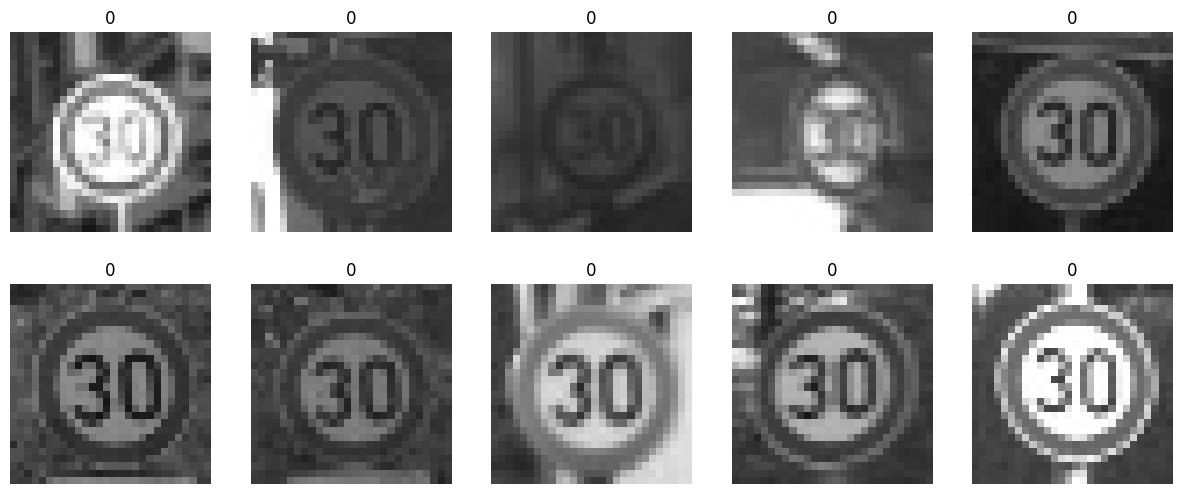

In [3]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

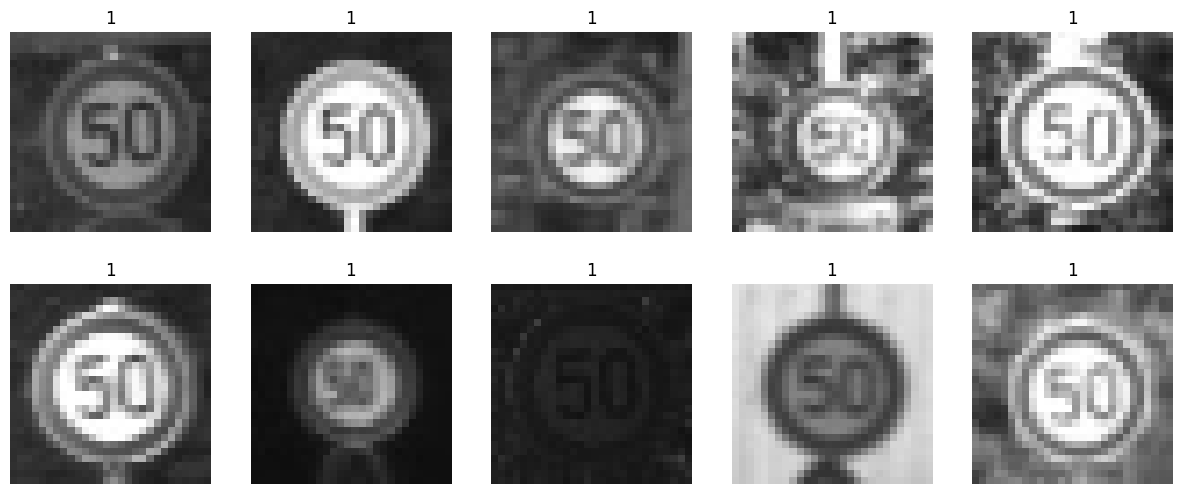

In [4]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [5]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [6]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


Flatten to prepare for neural network

In [7]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.033611297607421875


Before the training, let's again have a look at some raqndom samples from our dataset.

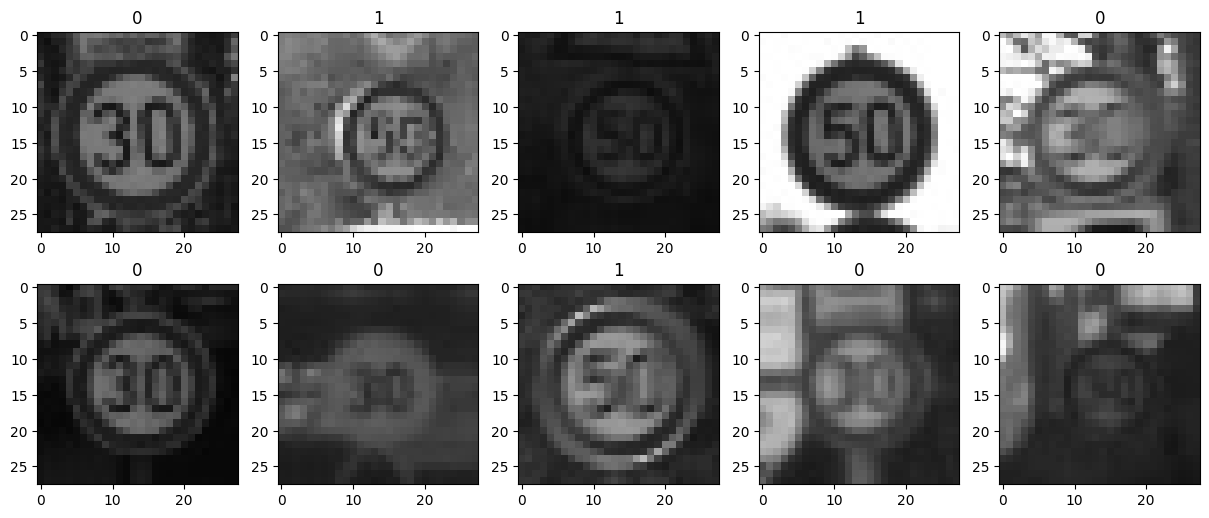

In [8]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [9]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

C:\Users\gevor\.conda\envs\ComputerVision\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [10]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

Before starting the training, we have to compile the model. During the compilation, we indicate what optimizer we want to use and what loss should be applied for the minimization process.

In [12]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [13]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3192
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2129
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1791
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1456
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1397
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1231
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1132
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1045
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1039
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0975


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

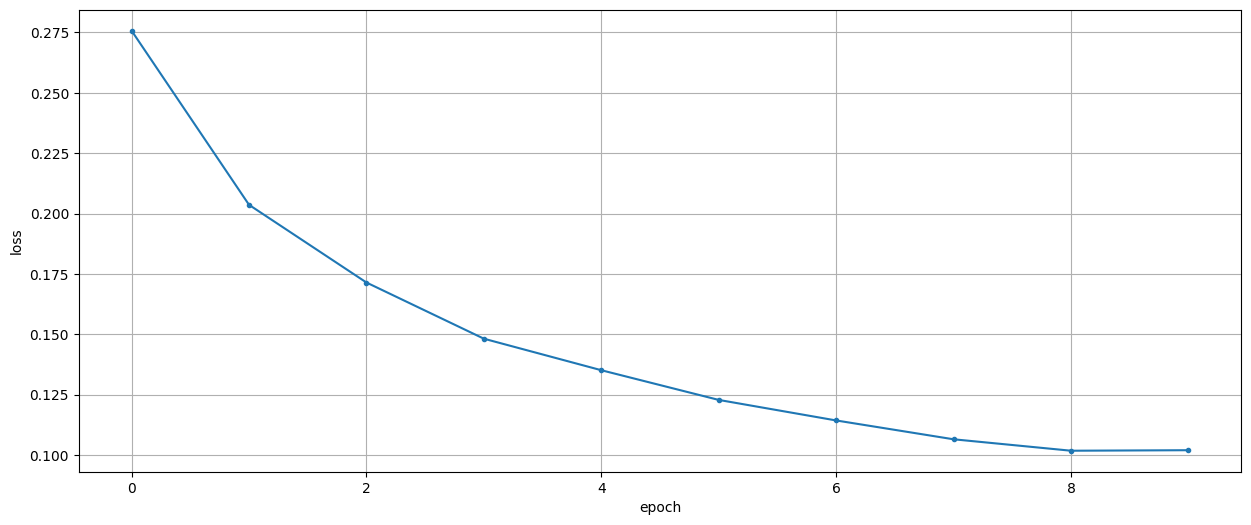

In [14]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.40883005] [0.40883005]


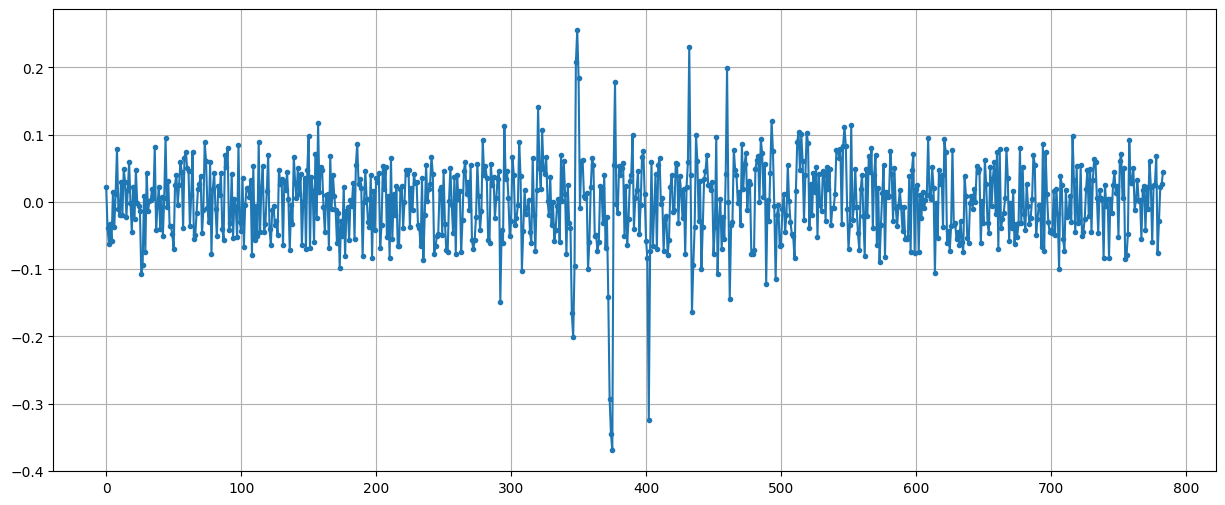

In [15]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [16]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[0.6833025]] 1


In [17]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [18]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9196868008948546


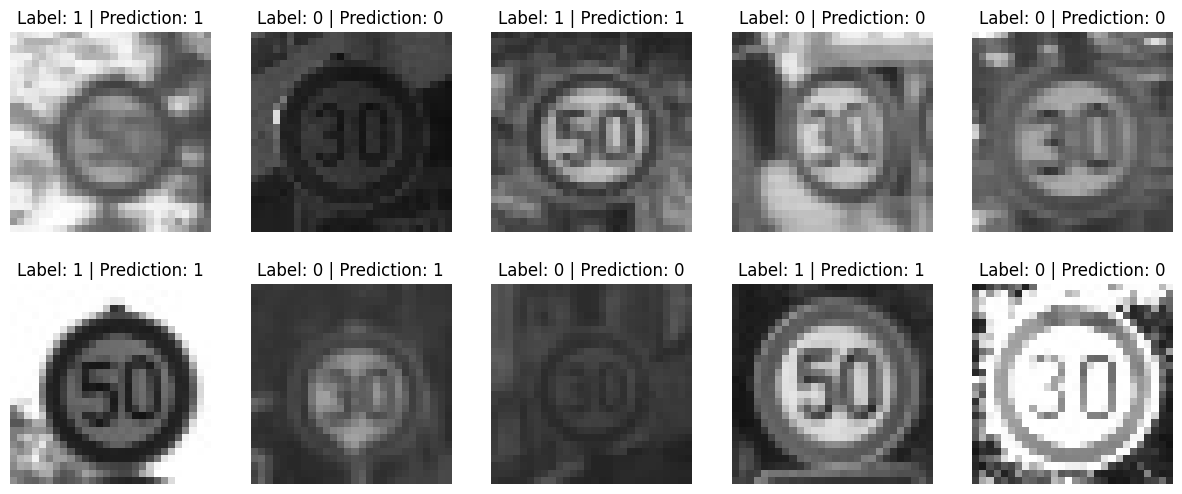

In [20]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(int(predictions[idx])))
    plt.axis(False)

# One neuron conclusion

Not bad for one neuron, but I wouldnt believe much this accuracy, as I measure it on the training sample :)

In [21]:
# Define the input layer
inputs = Input(shape=(pixels.shape[1],))

# Add the first hidden layer with 3 neurons and activation function
x = Dense(3, activation="relu")(inputs)

# Add the second hidden layer with 3 neurons
x = Dense(3, activation="relu")(x)

# Add the third hidden layer with 3 neurons
x = Dense(3, activation="relu")(x)

# Add the output layer 
outputs = Dense(1, activation="linear")(x)

# Create the model
model = Model(inputs, outputs)

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           2,355 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,383 (9.31 KB)

 Trainable params: 2,383 (9.31 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3103
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2305
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1987
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1732
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1404
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1155
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1018
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0880
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0807
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0758


In [24]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy 0.9440715883668904


Made some improvements (3%) adding 3 "relu" layers of 3 neurons. Lets see if increasing number of neurons in each helps

In [25]:
# Define the input layer
inputs = Input(shape=(pixels.shape[1],))

# Add the first hidden layer with 20 neurons and activation function
x = Dense(20, activation="relu")(inputs)

# Add the second hidden layer with 20 neurons
x = Dense(20, activation="relu")(x)

# Add the third hidden layer with 20 neurons
x = Dense(20, activation="relu")(x)

# Add the output layer 
outputs = Dense(1, activation="linear")(x)

# Create the model
model = Model(inputs, outputs)

# Print the model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,561 (64.69 KB)

 Trainable params: 16,561 (64.69 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3322
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1969
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1330
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1056
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0920
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0771
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0639
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0566
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0539
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0564


In [27]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy 0.9501118568232663


Another 1 percent. Lets seee if I use more layers of 3 neurons

In [29]:
# Define the input layer
inputs = Input(shape=(pixels.shape[1],))

# Add the first hidden layer with 3 neurons and activation function
x = Dense(3, activation="relu")(inputs)

# Add the second hidden layer with 3 neurons
x = Dense(3, activation="relu")(x)

# Add the third hidden layer with 3 neurons
x = Dense(3, activation="relu")(x)

# and few more
x = Dense(3, activation="relu")(x)
x = Dense(3, activation="relu")(x)
x = Dense(3, activation="relu")(x)
x = Dense(3, activation="relu")(x)
x = Dense(3, activation="relu")(x)

# Add the output layer 
outputs = Dense(1, activation="linear")(x)

# Create the model
model = Model(inputs, outputs)

# Print the model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │           2,355 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,443 (9.54 KB)

 Trainable params: 2,443 (9.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4582
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3699
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3141
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2734
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2586
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2548
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2513
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2503
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2501
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2500


In [31]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy 0.5033557046979866


Interesting, it got worse :)

In [ ]:
# Rankings:
1. 3 hidden layers of 20 neurons
2. 